## Import general packages

In [1]:
import pandas as pd
import os
import sys
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.stats import ttest_rel
from scipy.stats import normaltest
from scipy.stats import wilcoxon
from scipy.stats import ks_2samp

## Define locations

In [2]:
# Change this to the path of your repo.
loc_main = 'C:\\Users\\johanr\\OneDrive - Ortec B.V\\Data Analysis for Strengths and Weaknesses\\Sustainable_code_structure'

# Define paths inside of our repo
loc_input_data = os.path.join(loc_main, 'data', 'input')
loc_intermediate_data = os.path.join(loc_main, 'data', 'intermediate')
loc_output_data = os.path.join(loc_main, 'data', 'output')
loc_utils = os.path.join(loc_main, 'code')

In [8]:
sys.path.insert(1, loc_utils)
from data_utils import plot_skewness,from_original_to_smoothed,plot_original_smoothed,plot_cost_ori_smoothed,extract_output_features_from_folder,sample_instance,sample_ind,extract_input_features_from_folder

## Import required data

In [12]:

filepath_original = loc_intermediate_data + "\\TW analysis\\Original"
filepath_manipulated = loc_intermediate_data + "\\TW analysis\\Manipulated"
file_original = loc_intermediate_data + "\\TW analysis\\Original\\00c0a5d6-d8f9-434e-a99a-6a5ba7952ded.json"
file_manipulated = loc_intermediate_data + "\\TW analysis\\Manipulated\\00c0a5d6-d8f9-434e-a99a-6a5ba7952ded.json"
dataframe_original = pd.read_csv(loc_intermediate_data + "\\TW analysis\\In_Out_Feature_Ori_Manip\\Original_in_out.csv")
dataframe_manipulated = pd.read_csv(loc_intermediate_data + "\\TW analysis\\In_Out_Feature_Ori_Manip\\Manipulated_in_out.csv")
pooled_tasks = pd.read_csv(loc_intermediate_data+"\\pooled_from_instances_for_simulation\\pooled_tasks",index_col=0)
pooled_depots = pd.read_csv(loc_intermediate_data+"\\pooled_from_instances_for_simulation\\pooled_depots",index_col=0)
pooled_routes = pd.read_csv(loc_intermediate_data+"\\pooled_from_instances_for_simulation\\pooled_routes",index_col=0)
doe=pd.read_csv(loc_intermediate_data+"\\NEWtest I Optimal Design 5CP 20 Replicates1020.txt")
test_filepath = loc_intermediate_data + "\\Test simulation"
simulated_instances_filepath = loc_intermediate_data + "\\simulated instances sample\\data"
responses_optimization_filepath = loc_intermediate_data + "\\simulated instances sample\\response"
logs_optimization_filepath = loc_intermediate_data + "\\simulated instances sample\\log"

## Figure 5.19 Skewness by the mean

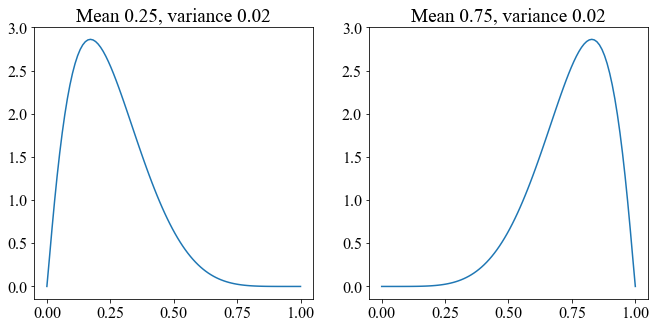

In [5]:
plot_skewness(mean=0.25,mean2=0.75,variance=0.02,variance2 =0.02)

## Original versus smoothed analysis

### Creation of smoothed TW instances from original TW instances

This has already been run and gave the files in filepath_manipulated, !do not run!

In [17]:
from_original_to_smoothed(filepath_original,filepath_manipulated) #This has already been run and gave the files in filepath_manipulated

KeyboardInterrupt: 

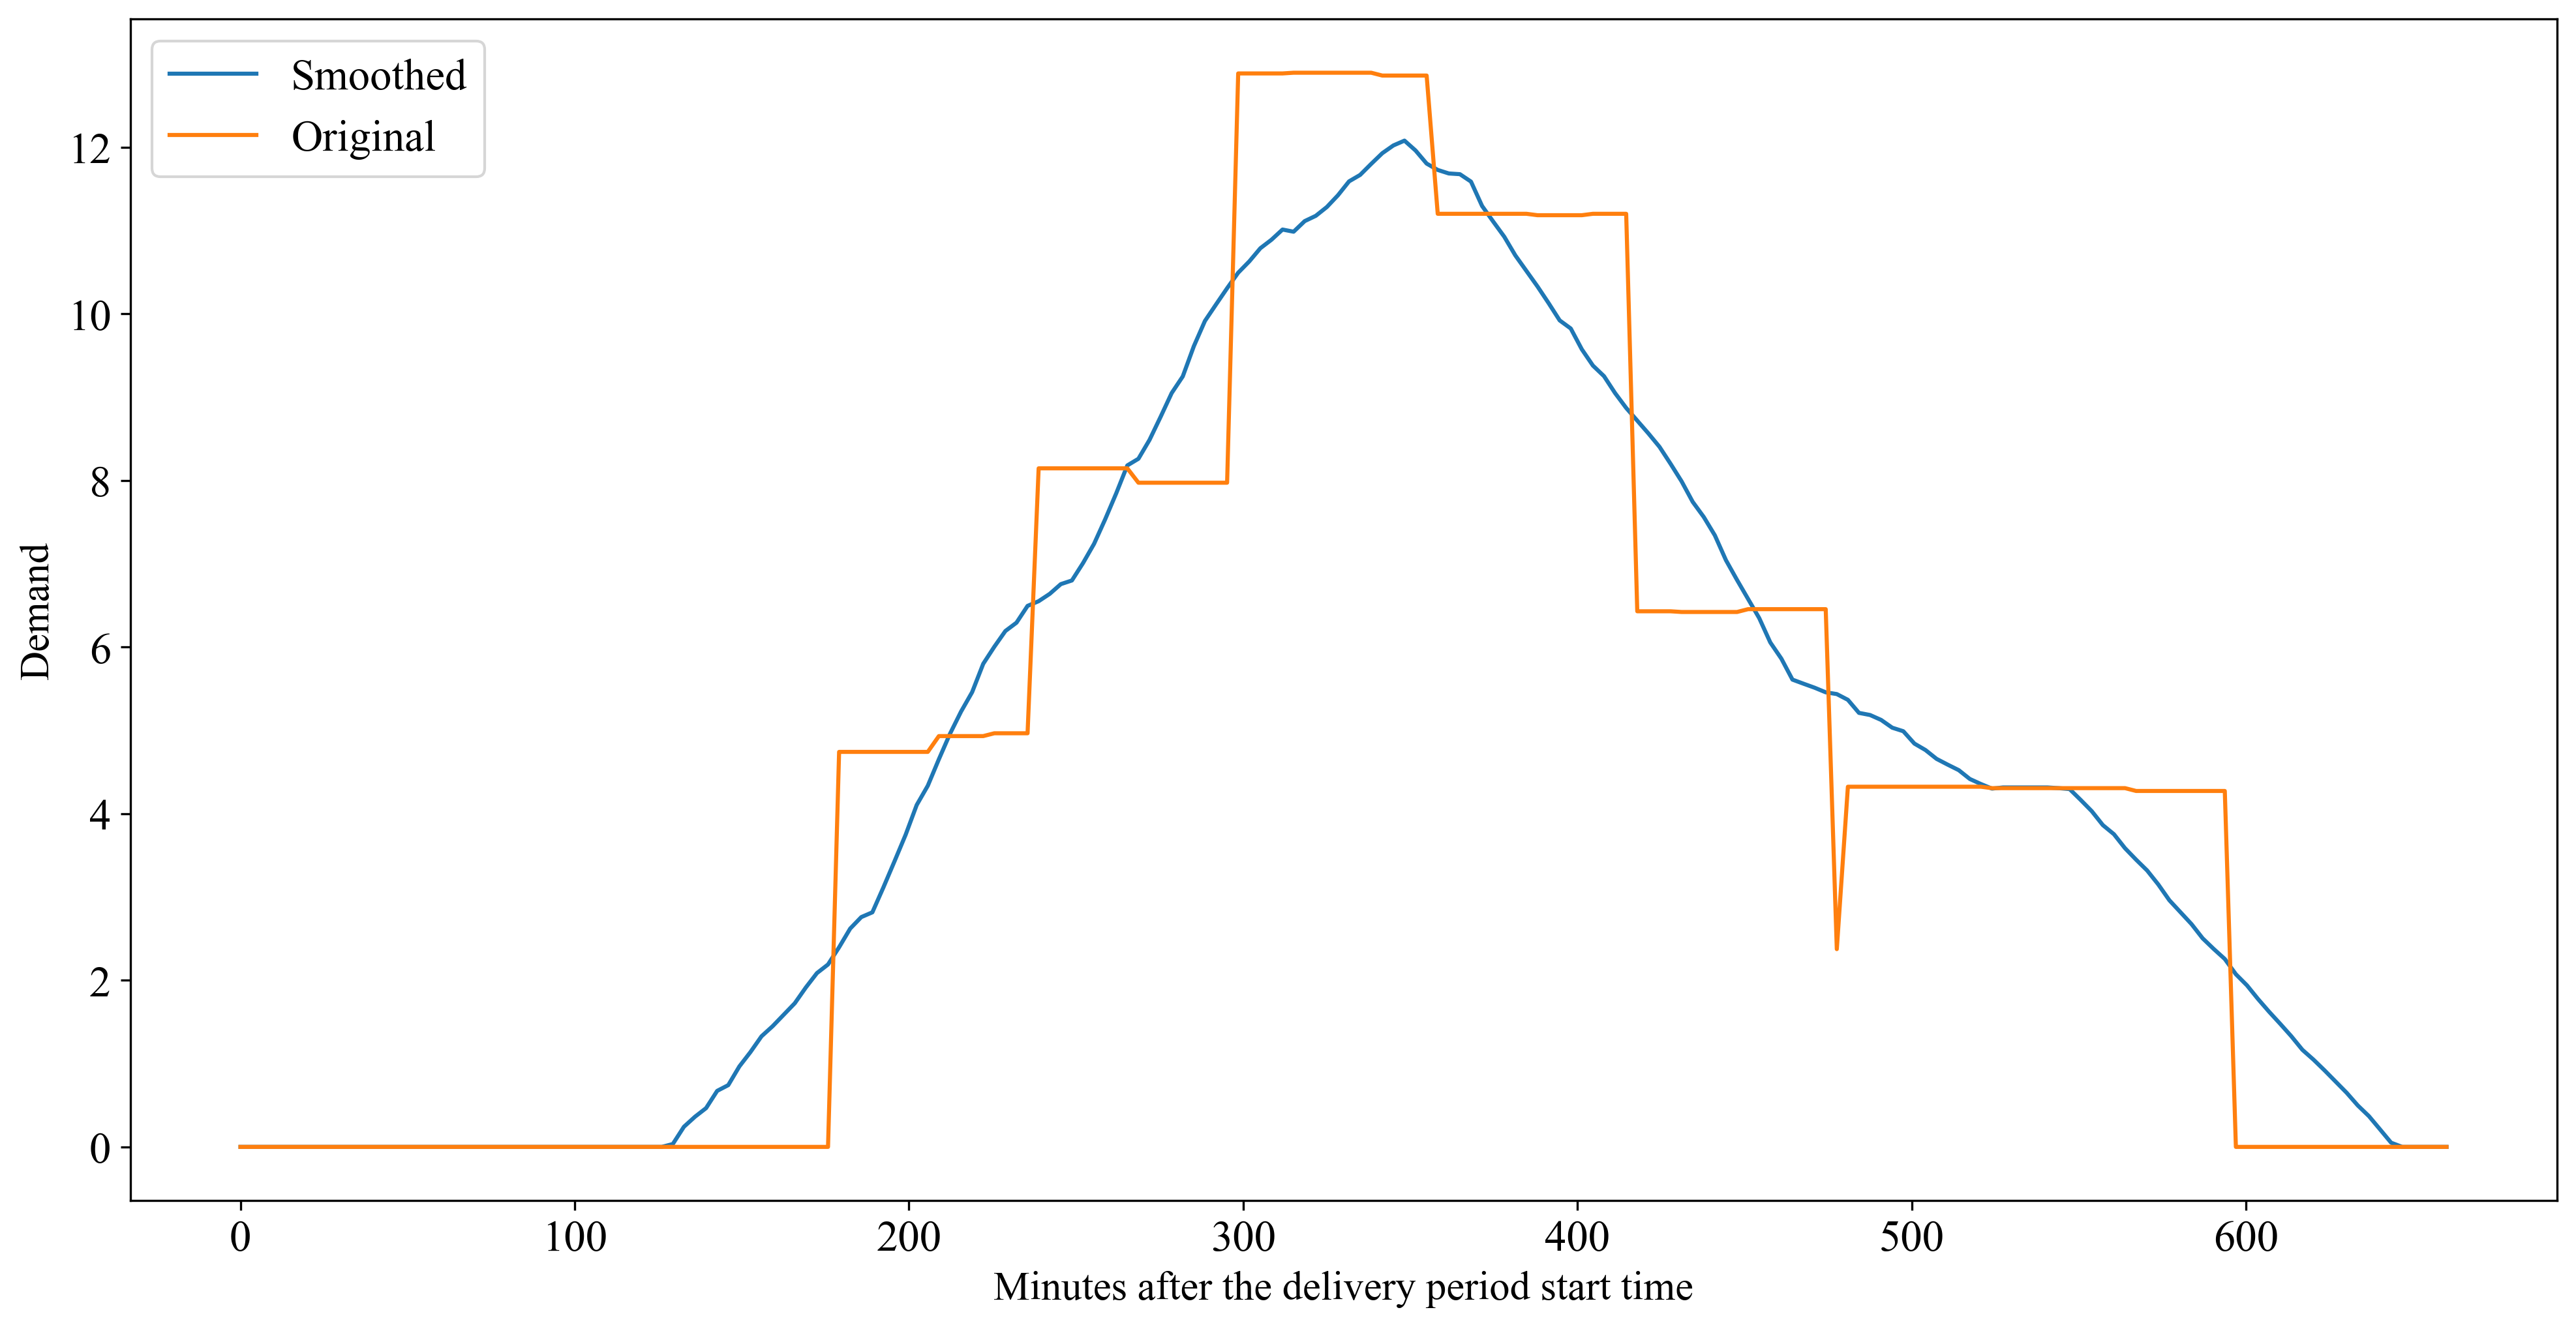

In [6]:
plot_original_smoothed(file_original,file_manipulated)

### Extract input from Original and Manipulated

Use this to extract input from original instances

Takes around 1h

In [9]:
extract_input_features_from_folder(filepath_original)

Extracting from 30 instances


1it [02:59, 179.01s/it]


KeyboardInterrupt: 

Use this to extract input from manipulated instances

In [ ]:
extract_input_features_from_folder(filepath_manipulated)

### Assessing the difference between Original and manipulated

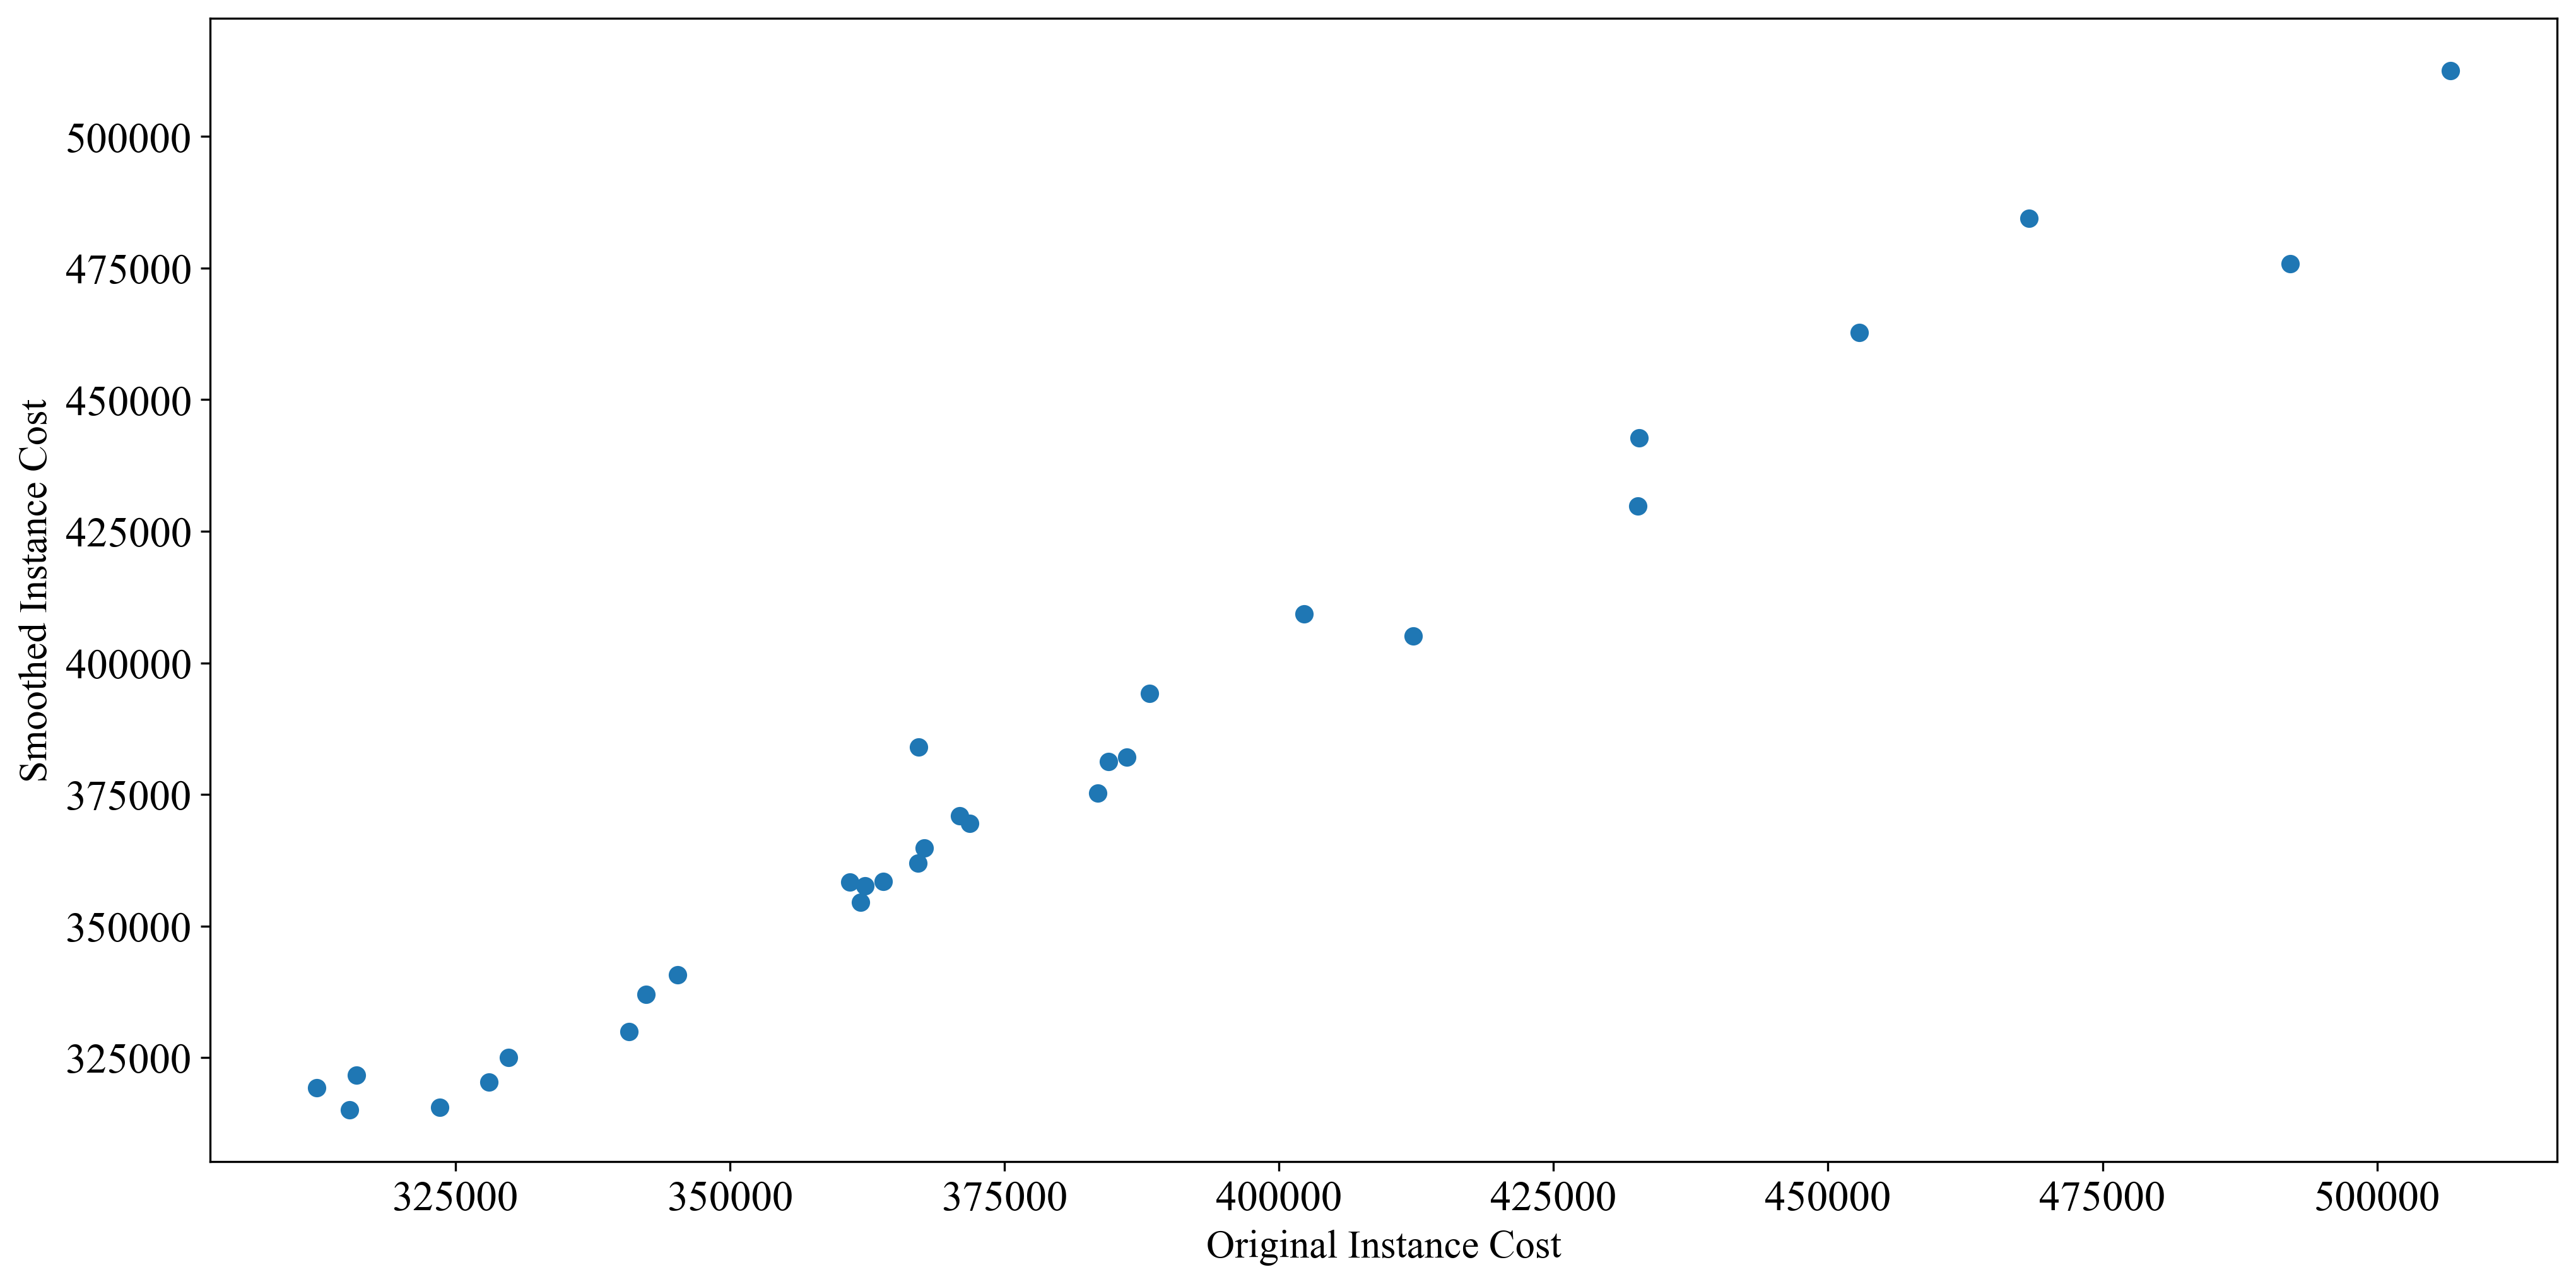

In [7]:
dataframe_ori2,dataframe_mani2 = plot_cost_ori_smoothed(dataframe_original,dataframe_manipulated)

### Statistical tests

In [20]:
ttest_rel(dataframe_ori2['final_cost'], dataframe_mani2['final_cost'])

Ttest_relResult(statistic=0.6874584278369499, pvalue=0.4972555962843418)

In [21]:
normaltest(dataframe_ori2['final_cost']-dataframe_mani2['final_cost'])

NormaltestResult(statistic=2.534033609609757, pvalue=0.2816706481906486)

In [22]:
wilcoxon(dataframe_ori2['final_cost'], dataframe_mani2['final_cost'])

WilcoxonResult(statistic=195.0, pvalue=0.4405215911492053)

In [23]:
ks_2samp(dataframe_ori2['final_cost'], dataframe_mani2['final_cost'])

KstestResult(statistic=0.13333333333333333, pvalue=0.9578462903438838)

## Example of simulation

In [24]:
pooled_tasks=pooled_tasks.astype({'time_from':'datetime64', 'time_till':'datetime64'})
pooled_tasks['addressHandlingDuration']=pooled_tasks['addressHandlingDuration'].apply(lambda x: pd.to_timedelta(x))
pooled_routes=pooled_routes.astype({'start_time':'datetime64', 'finishtime':'datetime64'})
for j in ['preparationDuration', 'turnaroundDuration', 'maximumDuration', 'minbreak1', 'maxbreak1', 'durbreak1', 'minbreak2', 'maxbreak2', 'durbreak2']:
    pooled_routes[j]=pooled_routes[j].apply(lambda x: pd.to_timedelta(x))
interest=pooled_tasks[['address_lat', 'address_lon']]
interest=np.array(interest)
clustering = DBSCAN(eps=0.002, min_samples=4).fit(interest)
pooled_tasks['cluster_label']=clustering.labels_

Running the simulation of our DOE. The files would be stored in a test folder and not interact with our simulated instances. You can run but it takes a bit of time 

In [8]:
doe=doe.drop(columns=['Time'])
doe=doe.replace(',', '.', regex=True)
doe=doe.astype(float)
doe=doe.round({'Number Customer': 0, 'Number Vehicles': 0})
doe=doe.astype({'Number Customer':'int', 'Number Vehicles':"int"})
doe=np.array(doe)
for i in doe:
    sample_instance(int(i[0]), i[4], i[5], i[6], 40, 100, 1000,  int(i[1]), i[2], i[3], i[7], test_filepath,pooled_tasks,pooled_depots,pooled_routes)

KeyboardInterrupt: 

# Example of extraction of input and output on our simulated instances

Takes 8h on full dataset

In [13]:
extract_input_features_from_folder(simulated_instances_filepath)

Extracting from 3 instances


3it [00:03,  1.06s/it]


,Dataset,Mean Dist Matrix,Std Dist Matrix,Mean Distance Depot Centroid,Number of clusters,Customer Time Window Mean,Customer Time Window Std,Number of customers,Number of vehicles,Vehicles Time Window Mean,Vehicles Time Window Std,Ortecs Customer,Customer Demand Location,Vehicle Availability
0,task_num-100_task_tw_mean-60.0_task_tw_std-0.0...,46502.3878,34701.383602,33.350721,9,60.0,0.0,100,23,220.000000,0.000000,Simulated,0.005,0.655
1,task_num-100_task_tw_mean-60.0_task_tw_std-0.0...,51930.8900,40617.917959,33.253887,10,60.0,0.0,100,23,219.998551,100.002239,Simulated,0.060,0.610
2,task_num-100_task_tw_mean-60.0_task_tw_std-0.0...,39331.8353,31377.072818,33.390402,8,60.0,0.0,100,23,220.002174,99.999048,Simulated,0.105,0.220


In [14]:
extract_output_features_from_folder(responses_optimization_filepath,logs_optimization_filepath)

Extracting from 3 instances


3it [00:00, 21.36it/s]


,Dataset,Final Cost,Final Time,Number of planned tasks,Cost Array,Time Array,Number of planned tasks Array
0,task_num-100_task_tw_mean-60.0_task_tw_std-0.0...,24678.259833,1.558302,41,0 979.540667 1095.303333 3561.768444 3611.9175...,0.000102 0.003 0.003309 0.004398 0.004737 0.00...,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
1,task_num-100_task_tw_mean-60.0_task_tw_std-0.0...,42324.022911,5.255622,69,0 332.977333 3009.922467 3155.300078 5506.8495...,9.3e-05 0.004028 0.006512 0.006882 0.007992 0....,0 1 2 3 4 5 6 7 8 8 9 10 11 12 13 14 15 16 17 ...
2,task_num-100_task_tw_mean-60.0_task_tw_std-0.0...,50358.388922,10.168396,92,0 884.802667 909.226667 3265.459944 5704.07378...,0.000202 0.005257 0.005836 0.009342 0.011819 0...,0 1 2 3 4 5 6 7 8 9 10 11 11 11 11 11 12 13 14...
